#### 1. 


In [745]:
import pickle
enron_data = pickle.load(open('./final_project/final_project_dataset.pkl','rb'))


In [572]:
enron_keys = list(enron_data.keys())
keys_as_set = set(enron_keys)
keys_as_set

{'ALLEN PHILLIP K',
 'BADUM JAMES P',
 'BANNANTINE JAMES M',
 'BAXTER JOHN C',
 'BAY FRANKLIN R',
 'BAZELIDES PHILIP J',
 'BECK SALLY W',
 'BELDEN TIMOTHY N',
 'BELFER ROBERT',
 'BERBERIAN DAVID',
 'BERGSIEKER RICHARD P',
 'BHATNAGAR SANJAY',
 'BIBI PHILIPPE A',
 'BLACHMAN JEREMY M',
 'BLAKE JR. NORMAN P',
 'BOWEN JR RAYMOND M',
 'BROWN MICHAEL',
 'BUCHANAN HAROLD G',
 'BUTTS ROBERT H',
 'BUY RICHARD B',
 'CALGER CHRISTOPHER F',
 'CARTER REBECCA C',
 'CAUSEY RICHARD A',
 'CHAN RONNIE',
 'CHRISTODOULOU DIOMEDES',
 'CLINE KENNETH W',
 'COLWELL WESLEY',
 'CORDES WILLIAM R',
 'COX DAVID',
 'CUMBERLAND MICHAEL S',
 'DEFFNER JOSEPH M',
 'DELAINEY DAVID W',
 'DERRICK JR. JAMES V',
 'DETMERING TIMOTHY J',
 'DIETRICH JANET R',
 'DIMICHELE RICHARD G',
 'DODSON KEITH',
 'DONAHUE JR JEFFREY M',
 'DUNCAN JOHN H',
 'DURAN WILLIAM D',
 'ECHOLS JOHN B',
 'ELLIOTT STEVEN',
 'FALLON JAMES B',
 'FASTOW ANDREW S',
 'FITZGERALD JAY L',
 'FOWLER PEGGY',
 'FOY JOE',
 'FREVERT MARK A',
 'FUGH JOHN L',
 'GAHN 

In [573]:
# 剔除THE TRAVEL AGENCY IN THE PARK, TOTAL
# enron_data.pop('THE TRAVEL AGENCY IN THE PARK')
enron_data.pop('TOTAL',0)
print("数据个数 %s " %(str(len(enron_data))))

数据个数 145 


In [874]:
features = set()
for name, feature in enron_data.items():
    for f in feature.keys():
        features.add(f)
print("feature个数 %s" % str(len(features)))
print("features:")
print(features)

feature个数 21
features:
{'restricted_stock_deferred', 'from_this_person_to_poi', 'bonus', 'salary', 'other', 'expenses', 'deferral_payments', 'email_address', 'total_stock_value', 'poi', 'from_poi_to_this_person', 'total_payments', 'shared_receipt_with_poi', 'deferred_income', 'to_messages', 'from_messages', 'director_fees', 'loan_advances', 'exercised_stock_options', 'long_term_incentive', 'restricted_stock'}


In [575]:
# POI name:
poi_names = []
for name, feature in enron_data.items():
    if feature['poi'] == 1:
        poi_names.append(name)
        
print("所有的poi姓名, 共有%d个" % len(poi_names))
poi_names


所有的poi姓名, 共有18个


['HANNON KEVIN P',
 'COLWELL WESLEY',
 'RIEKER PAULA H',
 'KOPPER MICHAEL J',
 'SHELBY REX',
 'DELAINEY DAVID W',
 'LAY KENNETH L',
 'BOWEN JR RAYMOND M',
 'BELDEN TIMOTHY N',
 'FASTOW ANDREW S',
 'CALGER CHRISTOPHER F',
 'RICE KENNETH D',
 'SKILLING JEFFREY K',
 'YEAGER F SCOTT',
 'HIRKO JOSEPH',
 'KOENIG MARK E',
 'CAUSEY RICHARD A',
 'GLISAN JR BEN F']

In [576]:
# 主要特征中包含NAN数据的
def check_nan(feature_key):
    results = []
    for name ,feature in enron_data.items():
        if feature[feature_key] == 'NaN':
            results.append(name)
    return results


In [578]:
# Salary
salary_nans = check_nan('salary')
salary_nans
print("共有%d个salary为nan" % len(salary_nans))

共有51个salary为nan


In [577]:
# total_payments
total_payments_nans = check_nan("total_payments")
print("共有%d个total_payments为nan" % len(total_payments_nans))

共有21个total_payments为nan


In [579]:
# long_term_incentive
long_term_incentive_nans = check_nan('long_term_incentive')
print("共有%d个long_term_incentive为nan" % (len(long_term_incentive_nans)))


共有80个long_term_incentive为nan


In [580]:
# total_stock_value
total_stock_value_nans = check_nan('total_stock_value')
print("%d个total_stock_value为nan" % len(total_payments_nans))

21个total_stock_value为nan


#### 主要特征都是NaN的

In [581]:
many_nans = []
for name in total_payments_nans:
    if name in salary_nans and name in long_term_incentive_nans and name in total_stock_value_nans and name in total_payments_nans:
        many_nans.append(name)
many_nans

['CHAN RONNIE', 'POWERS WILLIAM', 'LOCKHART EUGENE E']

In [582]:
for name in many_nans:
    print(name)
    print(enron_data[name])

CHAN RONNIE
{'salary': 'NaN', 'to_messages': 'NaN', 'deferral_payments': 'NaN', 'total_payments': 'NaN', 'loan_advances': 'NaN', 'bonus': 'NaN', 'email_address': 'NaN', 'restricted_stock_deferred': -32460, 'deferred_income': -98784, 'total_stock_value': 'NaN', 'expenses': 'NaN', 'from_poi_to_this_person': 'NaN', 'exercised_stock_options': 'NaN', 'from_messages': 'NaN', 'other': 'NaN', 'from_this_person_to_poi': 'NaN', 'poi': False, 'long_term_incentive': 'NaN', 'shared_receipt_with_poi': 'NaN', 'restricted_stock': 32460, 'director_fees': 98784}
POWERS WILLIAM
{'salary': 'NaN', 'to_messages': 653, 'deferral_payments': 'NaN', 'total_payments': 'NaN', 'loan_advances': 'NaN', 'bonus': 'NaN', 'email_address': 'ken.powers@enron.com', 'restricted_stock_deferred': 'NaN', 'deferred_income': -17500, 'total_stock_value': 'NaN', 'expenses': 'NaN', 'from_poi_to_this_person': 0, 'exercised_stock_options': 'NaN', 'from_messages': 26, 'other': 'NaN', 'from_this_person_to_poi': 0, 'poi': False, 'long_t

#### 看到LOCKHART EUGENE E对应的所有features都是NaN, 应该是异常点,从原始数据中删除

In [583]:
enron_data.pop('LOCKHART EUGENE E',0)

{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'NaN',
 'exercised_stock_options': 'NaN',
 'expenses': 'NaN',
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 'NaN',
 'poi': False,
 'restricted_stock': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'salary': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 'NaN',
 'total_stock_value': 'NaN'}

In [744]:
original_data_path = 'final_project/original_cleaned_data.pkl'

In [585]:
pickle.dump(enron_data,open(original_data_path,'wb'))
# 临时变量保存清洗后的data
original_cleaned_data = pickle.load(open(original_data_path,'rb'))
original_cleaned_data

{'ALLEN PHILLIP K': {'bonus': 4175000,
  'deferral_payments': 2869717,
  'deferred_income': -3081055,
  'director_fees': 'NaN',
  'email_address': 'phillip.allen@enron.com',
  'exercised_stock_options': 1729541,
  'expenses': 13868,
  'from_messages': 2195,
  'from_poi_to_this_person': 47,
  'from_this_person_to_poi': 65,
  'loan_advances': 'NaN',
  'long_term_incentive': 304805,
  'other': 152,
  'poi': False,
  'restricted_stock': 126027,
  'restricted_stock_deferred': -126027,
  'salary': 201955,
  'shared_receipt_with_poi': 1407,
  'to_messages': 2902,
  'total_payments': 4484442,
  'total_stock_value': 1729541},
 'BADUM JAMES P': {'bonus': 'NaN',
  'deferral_payments': 178980,
  'deferred_income': 'NaN',
  'director_fees': 'NaN',
  'email_address': 'NaN',
  'exercised_stock_options': 257817,
  'expenses': 3486,
  'from_messages': 'NaN',
  'from_poi_to_this_person': 'NaN',
  'from_this_person_to_poi': 'NaN',
  'loan_advances': 'NaN',
  'long_term_incentive': 'NaN',
  'other': 'NaN'

#### 探究变量之间的关系

In [586]:
import matplotlib.pyplot as plot
from tools.feature_format import featureFormat

def plot_variance(features_name_list):
    """
    绘制两个变量的散点图
    """
    features_data = featureFormat(enron_data, features_name_list)
    
    for point in features_data:
        plot.scatter(point[0], point[1])
    
    plot.xlabel(features_name_list[0])
    plot.ylabel(features_name_list[1])
    plot.show()
    return features_data

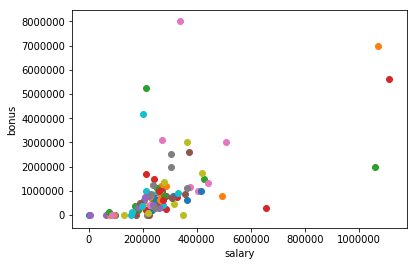

In [466]:
# salary, bonus
features_name_list = ['salary', 'bonus']
return_data = plot_variance(features_name_list)


#### 从散点图可以看到有2个明显的异常点，bonus和salary都远高于其他人，是否是poi？

In [467]:
# 找到他们的name
salary_map_name = {}
name_map_poi = {}
for name ,feature in enron_data.items():
    if feature['salary'] == 'NaN':
        continue
    salary_map_name[feature['salary']] = name
    name_map_poi[name] = feature['poi']
    
top_2_salary = sorted(list(salary_map_name.keys()), reverse=True)[:2]
top_2_salary_names = [salary_map_name[salary] for salary in top_2_salary]
for n in top_2_salary_names:
    print("\'%s\' is poi ? %d" % (n, name_map_poi[n]))

'SKILLING JEFFREY K' is poi ? 1
'LAY KENNETH L' is poi ? 1


#### 根据计算结果，两个人都是poi

#### emails.
#### 增加新的属性ratio_email_with_poi. 根据邮件中与POI交互邮件所占比来分析是否是poi。
#### 注意NaN和0的处理.

In [587]:
def get_and_fix_nan(data,key):
    """
    从字典中取值，如果是NaN，就修正为0.0
    """
    value = data[key]
    if value == 'NaN':
        value = 0.
    return value

def get_total(key1, key2):
    """
    获取加和计算之后的列表
    """
    total = {}
    for name ,feature in enron_data.items():
        value1 = get_and_fix_nan(feature, key1)
        value2 = get_and_fix_nan(feature, key2)
        total[name]=(value1+value2)
    return total

In [588]:
email_with_poi = get_total('from_poi_to_this_person', 'from_this_person_to_poi')
total_email = get_total('to_messages', 'from_messages')

ratio_email_with_poi = {}
for name, email_count in email_with_poi.items():
    if total_email[name] == 0.:
        ratio_email_with_poi[name] = 0.
    else:
        ratio_email_with_poi[name] = email_count/total_email[name]
ratio_email_with_poi

{'ALLEN PHILLIP K': 0.0219737100255052,
 'BADUM JAMES P': 0.0,
 'BANNANTINE JAMES M': 0.06554621848739496,
 'BAXTER JOHN C': 0.0,
 'BAY FRANKLIN R': 0.0,
 'BAZELIDES PHILIP J': 0.0,
 'BECK SALLY W': 0.0454623434551381,
 'BELDEN TIMOTHY N': 0.03964601769911504,
 'BELFER ROBERT': 0.0,
 'BERBERIAN DAVID': 0.0,
 'BERGSIEKER RICHARD P': 0.00904977375565611,
 'BHATNAGAR SANJAY': 0.0018115942028985507,
 'BIBI PHILIPPE A': 0.018822100789313904,
 'BLACHMAN JEREMY M': 0.010847730012053034,
 'BLAKE JR. NORMAN P': 0.0,
 'BOWEN JR RAYMOND M': 0.08222811671087533,
 'BROWN MICHAEL': 0.0091683038637852,
 'BUCHANAN HAROLD G': 0.0,
 'BUTTS ROBERT H': 0.0,
 'BUY RICHARD B': 0.04960664335664336,
 'CALGER CHRISTOPHER F': 0.08169219547775347,
 'CARTER REBECCA C': 0.11009174311926606,
 'CAUSEY RICHARD A': 0.03606388459556929,
 'CHAN RONNIE': 0.0,
 'CHRISTODOULOU DIOMEDES': 0.0,
 'CLINE KENNETH W': 0.0,
 'COLWELL WESLEY': 0.13959955506117908,
 'CORDES WILLIAM R': 0.01288659793814433,
 'COX DAVID': 0.029629629

In [589]:
# 在enron_data中增加新的属性
for name, feature in enron_data.items():
    feature['ratio_email_with_poi'] = ratio_email_with_poi[name]
    
print("增加属性之后的feature长度:", len(enron_data['BADUM JAMES P']))

增加属性之后的feature长度: 22


In [593]:
# 将上面的enrondata保存到pkl
enron_data_new_path = 'final_project/enron_data_new.pkl'
pickle.dump(enron_data, open(enron_data_new_path, 'wb'))


In [594]:
# 取出包含poi和ratio的列表,分析两个变量之间的关系
ratio_map_poi = {}
for name, feature in enron_data.items():
    is_poi = 0.
    if feature['poi'] == 'True' or feature['poi'] == True:
        is_poi = 1.0
    ratio_map_poi[feature['ratio_email_with_poi']] = is_poi
ratio_map_poi

{0.0: 0.0,
 0.0018115942028985507: 0.0,
 0.0045662100456621: 0.0,
 0.00581135449262405: 0.0,
 0.007253886010362694: 0.0,
 0.00849425568320704: 0.0,
 0.00904977375565611: 0.0,
 0.0091683038637852: 0.0,
 0.009168704156479218: 0.0,
 0.009453781512605041: 0.0,
 0.010224948875255624: 0.0,
 0.010847730012053034: 0.0,
 0.011172595520421607: 0.0,
 0.01288659793814433: 0.0,
 0.013513513513513514: 0.0,
 0.01555352241537054: 0.0,
 0.016383495145631068: 0.0,
 0.017236342389716622: 0.0,
 0.018581081081081082: 0.0,
 0.0186219739292365: 0.0,
 0.018822100789313904: 0.0,
 0.019676549865229112: 0.0,
 0.0208078335373317: 0.0,
 0.0219737100255052: 0.0,
 0.02700763593501768: 0.0,
 0.027184466019417475: 0.0,
 0.02792607802874743: 1.0,
 0.028076256499133447: 0.0,
 0.02831715210355987: 0.0,
 0.029001673173452314: 0.0,
 0.02962962962962963: 0.0,
 0.029989833954591663: 0.0,
 0.030438010393466965: 0.0,
 0.031007751937984496: 0.0,
 0.03159303882195449: 1.0,
 0.03193916349809886: 0.0,
 0.03225806451612903: 1.0,
 0

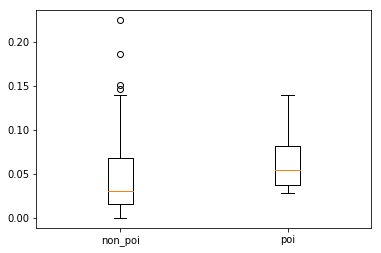

In [595]:
# 绘制两种分类的箱线图
non_pois = [ratio for ratio in ratio_map_poi if ratio_map_poi[ratio]<=0]
pois = [ratio for ratio in ratio_map_poi if ratio_map_poi[ratio]>=1]
plot.boxplot(x=[non_pois,pois], labels=['non_poi', 'poi'])
plot.show()

#### 从箱线图的分位数上可以看出，poi的人的邮件比重明显高于非poi的。因此可以将邮件比重作为新的属性来分析是不是poi。

#### 工具方法


In [929]:
def deep_copy(src_list):
    """
    将集合的元素全部复制到另一个集合，用来代替=赋值
    src_list: 源集合或者元组
    """
    return_list = [src_list[index] for index in range(len(src_list))]
    return return_list



In [932]:
def get_all_features(input_data, with_poi=True):
    all_features=[]
    name = list(input_data.keys())[0]
    features_dict = input_data[name]
    all_features = deep_copy(list(features_dict.keys()))
    if not with_poi:
        all_features.remove('poi')
    return all_features

#### 训练分类器


In [819]:
from tools.feature_format import targetFeatureSplit 
from sklearn.cross_validation import train_test_split 

In [878]:
# 从features中移除email_address
features = enron_data['HANNON KEVIN P'].keys()
features = list(features)
features_no_address = deep_copy(features)
features_no_address.remove('email_address')
features_no_address_new = deep_copy(features)
features_no_address_new.remove('email_address')
features_no_address_new.append('ratio_email_with_poi')

In [900]:
# 决策树分类
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

In [901]:
def prepare_data(input_data, features_list):
    data_format = featureFormat(input_data, features_list)
    targets, features = targetFeatureSplit(data_format)
    features_train, features_test, target_train, target_test = train_test_split(features, targets, test_size = 0.4, random_state=43)
    return features_train, features_test, target_train, target_test

In [906]:
def tree_classifier(input_data, features_list) :
    """
    使用决策树
    """
#     data_format = featureFormat(input_data, features_list)
#     targets, features = targetFeatureSplit(data_format)
#     features_train, features_test, target_train, target_test = train_test_split(features, targets, test_size = 0.4, random_state=43)
    features_train, features_test, target_train, target_test = prepare_data(input_data, features_list)
    
    clf = DecisionTreeClassifier()
    clf = clf.fit(features_train, target_train)
    pred = clf.predict(features_test)
    accu = accuracy(target_test, pred)
    print("准确率%f" % accu)
    prec = precision_score(target_test, pred)
    rec = recall_score(target_test, pred)
    f1 = f1_score(target_test, pred)
    print("精度%f" % prec)
    print("召回率%f" % rec)
    print("f1 %f" % f1)
    
    importance = clf.feature_importances_
    indices = list(numpy.argsort(importance))
    indices = reversed(indices)
    for no, index in enumerate(indices):
        if importance[index]>0:
            print("No.%d--属性%s的权重%f" % (no, features_list[index+1], importance[index]))


In [910]:
data_original = pickle.load(open(original_data_path, 'rb'))

features_no_address.remove('poi')
features_no_address.insert(0, 'poi')
tree_classifier(data_original, features_no_address)

准确率0.862069
精度0.200000
召回率0.200000
f1 0.200000
No.0--属性bonus的权重0.267654
No.1--属性deferred_income的权重0.246513
No.2--属性other的权重0.089206
No.3--属性exercised_stock_options的权重0.079578
No.4--属性deferral_payments的权重0.079294
No.5--属性expenses的权重0.075610
No.6--属性from_this_person_to_poi的权重0.075518
No.7--属性shared_receipt_with_poi的权重0.060414
No.8--属性salary的权重0.026213


In [943]:
# 新数据：
data_new = pickle.load(open(enron_data_new_path, 'rb'))

features_no_address_new.remove('poi')
features_no_address_new.insert(0, 'poi')
tree_classifier(data_new, features_no_address_new)

准确率0.810345
精度0.125000
召回率0.200000
f1 0.153846
No.0--属性bonus的权重0.267654
No.1--属性expenses的权重0.166232
No.2--属性deferred_income的权重0.155891
No.3--属性salary的权重0.105507
No.4--属性exercised_stock_options的权重0.079578
No.5--属性ratio_email_with_poi的权重0.075518
No.6--属性from_poi_to_this_person的权重0.060414
No.7--属性restricted_stock的权重0.060414
No.8--属性other的权重0.028791


#### 增加新的变量后，准确率没有上升。所以还是采用原来的features
#### 选择参数

In [936]:
# SelectKBest
data_original = pickle.load(open(original_data_path, 'rb'))
features_no_address = get_all_features(data_original, False)
features_no_address.remove('email_address')
features_train, features_test, targets_train, targets_test = prepare_data(data_original, features_no_address)

from sklearn.feature_selection import SelectKBest
selector = SelectKBest(k=10)
selector = selector.fit(features_train, targets_train)
features_selection = selector.get_support(indices=True)
features_names_selected = [features_no_address[index] for index in features_selection]
print("被选择的feature: ", features_names_selected)

被选择的feature:  ['deferral_payments', 'total_payments', 'loan_advances', 'restricted_stock_deferred', 'expenses', 'exercised_stock_options', 'from_messages', 'other', 'from_this_person_to_poi', 'shared_receipt_with_poi']


/Users/slash.wang/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


In [946]:
# 使用上面选择的feature再次进行决策树分类
data_original = pickle.load(open(original_data_path, 'rb'))
features_selected = ['poi','deferral_payments', 'total_payments', 'loan_advances', 'restricted_stock_deferred', 'expenses', 'exercised_stock_options', 'from_messages', 'other', 'from_this_person_to_poi', 'shared_receipt_with_poi']
tree_classifier(data_original, features_selected)

准确率0.879310
精度0.250000
召回率0.200000
f1 0.222222
No.0--属性exercised_stock_options的权重0.294343
No.1--属性shared_receipt_with_poi的权重0.220184
No.2--属性total_payments的权重0.214295
No.3--属性from_this_person_to_poi的权重0.157901
No.4--属性expenses的权重0.113277


#### 对比原来的训练结果，准确率有提高，精度从0.2提高到0.25

#### 选择其他算法：


In [954]:
# Naive_bayes
from sklearn.naive_bayes import GaussianNB
data_original = pickle.load(open(original_data_path, 'rb'))
features_train, features_test, targets_train, targets_test = prepare_data(data_original, features_selected)
nb = GaussianNB()
nb = nb.fit(features_train, targets_train)
pred = nb.predict(features_test)
accu = accuracy(targets_test, pred)
pre = precision_score(targets_test, pred)
recall = recall_score(targets_test, pred)
print("朴素贝叶斯模型准确率: %f" % accu)
print("精度: %f" % pre)
print("召回率: %f" % recall)

朴素贝叶斯模型准确率: 0.879310
精度: 0.333333
召回率: 0.400000


In [969]:
# SVC
from sklearn.svm import LinearSVC
data_original = pickle.load(open(original_data_path, 'rb'))
features_train, features_test, targets_train, targets_test = prepare_data(data_original, features_selected)
clf = LinearSVC()
clf = clf.fit(features_train, targets_train)
pred = clf.predict(features_test)
accu = accuracy(targets_test, pred)
pre = precision_score(targets_test, pred)
recall = recall_score(targets_test, pred)
print("朴素贝叶斯模型准确率: %f" % accu)
print("精度: %f" % pre)
print("召回率: %f" % recall)

朴素贝叶斯模型准确率: 0.724138
精度: 0.133333
召回率: 0.400000


#### 由于SVC,朴素贝叶斯模型模型准确率较低,因此采用决策树模型

#### 参数调整

In [982]:
# 使用GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
data_original = pickle.load(open(original_data_path, 'rb'))
features_train, features_test, targets_train, targets_test = prepare_data(data_original, features_selected)
params = {
         'min_samples_split': [2, 3, 4, 5, 6, 7, 8],
          'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
            'max_features': range(3,10)
          }
clf = GridSearchCV(DecisionTreeClassifier(), params)
clf = clf.fit(features_train, targets_train)
print (clf.best_estimator_)

# 再次对该模型进行计算
# clf = DecisionTreeClassifier()
# clf.fit(features_train, targets_train)
pred = clf.predict(features_test)
accu = accuracy(targets_test, pred)
precision = precision_score(targets_test, pred)
recall = recall_score(targets_test, pred)
print("准确率%f" % accu)
print("精度%f" % precision)
print("召回率%f" % recall)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
准确率0.913793
精度0.000000
召回率0.000000


/Users/slash.wang/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
